In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
import os
import shutil

# Define directories for the dataset and output
dataset_dir = '/content/drive/MyDrive/000/x_ray_weld/'
output_base_dir = '/content/0'

# Subdirectories for train, test, valid with defect and no-defect
categories = ['train', 'test', 'valid']
classes = ['defect', 'no-defect']
output_dirs = {category: {cls: os.path.join(output_base_dir, category, cls)
                          for cls in classes} for category in categories}

# Create output directories
for category_dirs in output_dirs.values():
    for path in category_dirs.values():
        os.makedirs(path, exist_ok=True)

# Function to process annotations and move images
def organize_images(annotation_path, image_dir, output_dirs):
    with open(annotation_path, 'r') as file:
        for line in file:
            parts = line.strip().split()
            if len(parts) < 2:
                continue

            image_name = parts[0]
            class_label = parts[1].split(',')[-1]

            # Determine target subdirectory
            class_name = 'defect' if class_label == '1' else 'no-defect'
            src_path = os.path.join(image_dir, image_name)
            dst_path = os.path.join(output_dirs[class_name], image_name)

            # Move the file if it exists
            if os.path.exists(src_path):
                shutil.copy(src_path, dst_path)

# Organize images for train, test, and valid
for category in categories:
    annotation_path = os.path.join(dataset_dir, category, '_annotations.txt')
    image_dir = os.path.join(dataset_dir, category)
    organize_images(annotation_path, image_dir, output_dirs[category])

print("Images have been organized successfully.")


Images have been organized successfully.


Found 333 images belonging to 2 classes.
333
Found 56 images belonging to 2 classes.
Found 27 images belonging to 2 classes.
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


11/11 ━━━━━━━━━━━━━━━━━━━━ 8s 335ms/step - accuracy: 0.4840 - loss: 41.9023 - val_accuracy: 0.7143 - val_loss: 3.7100
Epoch 2/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - accuracy: 0.6723 - loss: 4.0090 - val_accuracy: 0.7143 - val_loss: 0.5934
Epoch 3/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 77ms/step - accuracy: 0.7002 - loss: 0.6168 - val_accuracy: 0.7143 - val_loss: 0.5130
Epoch 4/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.6671 - loss: 0.6114 - val_accuracy: 0.7143 - val_loss: 0.5353
Epoch 5/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.6708 - loss: 0.6101 - val_accuracy: 0.7143 - val_loss: 0.5030
Epoch 6/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.6871 - loss: 0.5868 - val_accuracy: 0.7143 - val_loss: 0.5427
Epoch 7/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.7091 - loss: 0.5815 - val_accuracy: 0.7143 - val_loss: 0.5786
Epoch 8/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.6700 - loss: 0.6210 - val_accuracy: 0.7143 - val_loss: 

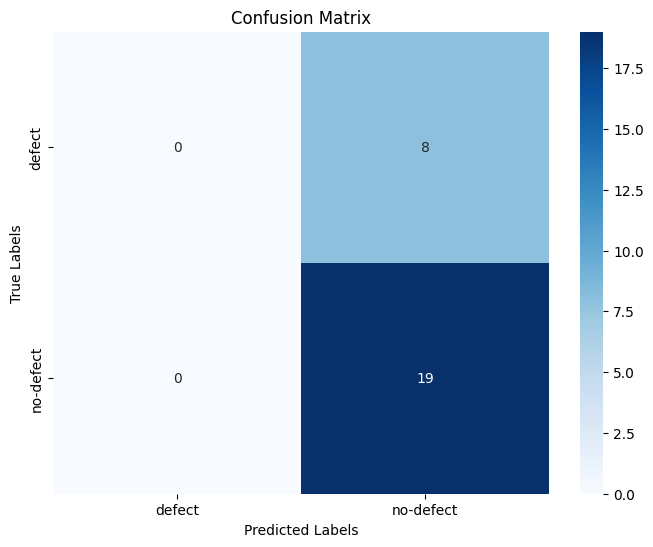

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report:
              precision    recall  f1-score   support

      defect       0.00      0.00      0.00         8
   no-defect       0.70      1.00      0.83        19

    accuracy                           0.70        27
   macro avg       0.35      0.50      0.41        27
weighted avg       0.50      0.70      0.58        27

Evaluating Faster R-CNN Model
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.2963 - loss: 0.7311
Test Accuracy: 0.29629629850387573
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Confusion Matrix:
[[ 8  0]
 [19  0]]


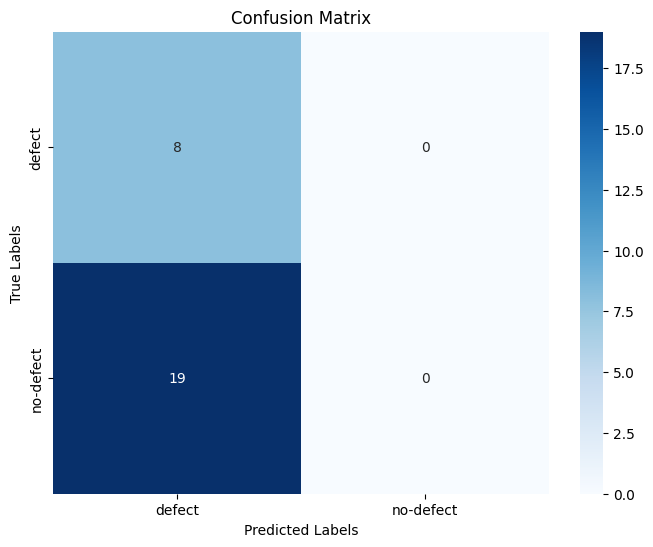

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report:
              precision    recall  f1-score   support

      defect       0.30      1.00      0.46         8
   no-defect       0.00      0.00      0.00        19

    accuracy                           0.30        27
   macro avg       0.15      0.50      0.23        27
weighted avg       0.09      0.30      0.14        27



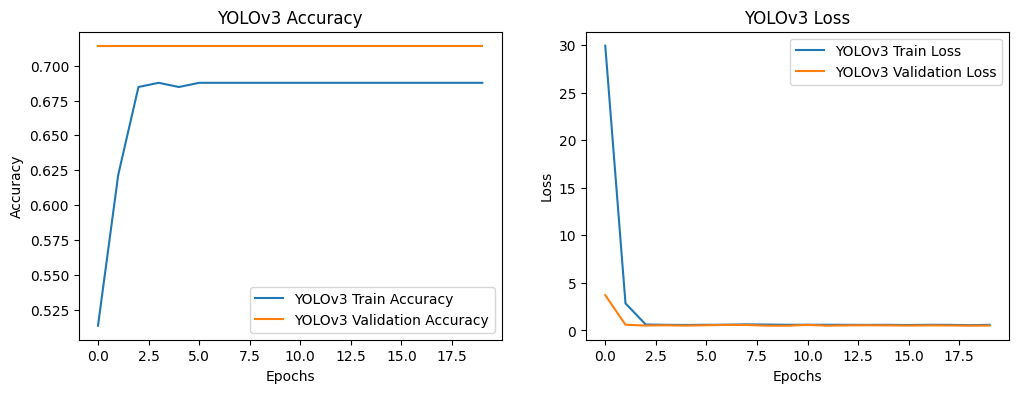

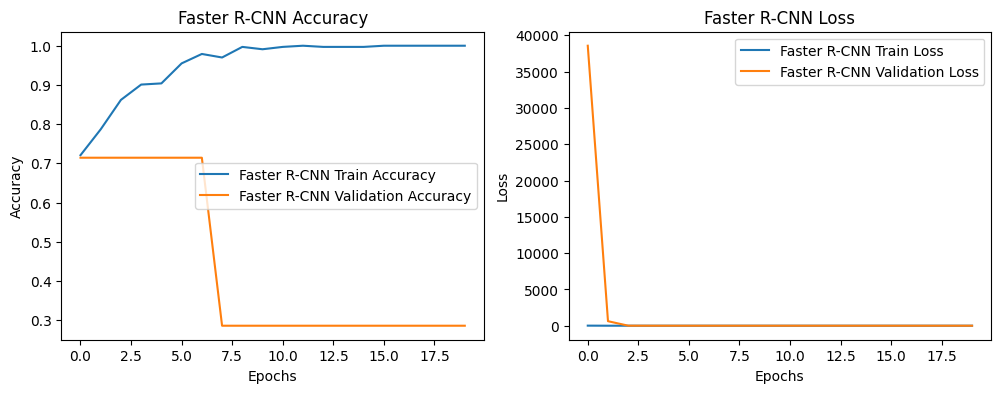

In [12]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

dataset_dir = "/content/0/"
train_dir = os.path.join(dataset_dir, "train")
val_dir = os.path.join(dataset_dir, "valid")
test_dir = os.path.join(dataset_dir, "test")

train_datagen = ImageDataGenerator(rescale=1.0 / 255)
val_datagen = ImageDataGenerator(rescale=1.0 / 255)
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

print(train_generator.samples)


val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

def build_yolov3_model(input_shape):
    inputs = Input(shape=input_shape)
    x = Flatten()(inputs)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.5)(x)
    outputs = Dense(train_generator.num_classes, activation='softmax')(x)
    return Model(inputs, outputs)

def build_faster_rcnn_model(input_shape):
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)
    x = Flatten()(base_model.output)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.5)(x)
    outputs = Dense(train_generator.num_classes, activation='softmax')(x)
    return Model(base_model.input, outputs)

yolov3_model = build_yolov3_model((224, 224, 3))
yolov3_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

faster_rcnn_model = build_faster_rcnn_model((224, 224, 3))
faster_rcnn_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

yolov3_history = yolov3_model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20
)

faster_rcnn_history = faster_rcnn_model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20
)

def evaluate_model(model, test_generator):
    loss, accuracy = model.evaluate(test_generator)
    print(f"Test Accuracy: {accuracy}")

    y_pred = model.predict(test_generator)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true = test_generator.classes

    cm = confusion_matrix(y_true, y_pred_classes)
    print("Confusion Matrix:")
    print(cm)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

    report = classification_report(y_true, y_pred_classes, target_names=test_generator.class_indices.keys())
    print("Classification Report:")
    print(report)

print("Evaluating YOLOv3 Model")
evaluate_model(yolov3_model, test_generator)

print("Evaluating Faster R-CNN Model")
evaluate_model(faster_rcnn_model, test_generator)

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(yolov3_history.history['accuracy'], label='YOLOv3 Train Accuracy')
plt.plot(yolov3_history.history['val_accuracy'], label='YOLOv3 Validation Accuracy')
plt.title('YOLOv3 Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(yolov3_history.history['loss'], label='YOLOv3 Train Loss')
plt.plot(yolov3_history.history['val_loss'], label='YOLOv3 Validation Loss')
plt.title('YOLOv3 Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(faster_rcnn_history.history['accuracy'], label='Faster R-CNN Train Accuracy')
plt.plot(faster_rcnn_history.history['val_accuracy'], label='Faster R-CNN Validation Accuracy')
plt.title('Faster R-CNN Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(faster_rcnn_history.history['loss'], label='Faster R-CNN Train Loss')
plt.plot(faster_rcnn_history.history['val_loss'], label='Faster R-CNN Validation Loss')
plt.title('Faster R-CNN Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()
